In [1]:
from PIL import Image, ImageDraw,ImageFont
import time,os
import numpy as np
import face_recognition
import matplotlib.pyplot as plt
import cv2
from matplotlib.patches import Rectangle
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定中文字体，如SimHei
plt.rcParams['axes.unicode_minus'] = False  # 解决负号'-'显示为方块的问题

In [2]:
# 导入face_recognition模块
import face_recognition
image_path = r"D:\BaiduSyncdisk\jupyter\012_人脸识别\dataset\test\刘亦菲.jpg"
image = face_recognition.load_image_file(image_path)

# 查找图片中人脸（上下左右）的位置，图像中可能有多个人脸
face_locations = face_recognition.face_locations(image)
# face_locations = face_recognition.face_locations(image, number_of_times_to_upsample=0, model="cnn")
print(face_locations)

[(96, 760, 171, 685), (104, 653, 211, 545), (529, 183, 592, 121), (450, 450, 558, 342), (116, 1081, 206, 991), (125, 253, 254, 124), (146, 1307, 221, 1232), (514, 1360, 604, 1270), (563, 959, 786, 736)]


In [3]:
Base_path = r"D:\BaiduSyncdisk\jupyter\012_人脸识别\dataset\精选图片"
all_labels = sorted([label for label in os.listdir(Base_path)])

known_face_encodings = []
known_face_names = []

for person in all_labels:
    path = os.path.join(Base_path, person)
    print(person)
    if not person in ['冯提莫', '刘亦菲', '杨颖']:continue
    n_ = 0
    for img in os.listdir(path):
        # if n_ > 5:
        #     continue
        
        img_path = os.path.join(path, img)
        
        obama_image = face_recognition.load_image_file(img_path)
        obama_face_encoding = face_recognition.face_encodings(obama_image)
        if len(obama_face_encoding) ==0:
            continue
        n_ += 1
        print(img)
        obama_face_encoding = obama_face_encoding[0]
        known_face_encodings.append(obama_face_encoding)
        known_face_names.append(person)

print(known_face_names)

冯提莫
冯提莫_0.jpg
冯提莫_10.jpg
冯提莫_2.jpg
冯提莫_25.jpg
冯提莫_27.jpg
冯提莫_28.jpg
冯提莫_5.jpg
冯提莫_6.jpg
冯提莫_7.jpg
冯提莫_9.jpg
刘亦菲
刘亦菲_0.jpg
刘亦菲_1.jpg
刘亦菲_12.jpg
刘亦菲_22.jpg
刘亦菲_23.jpg
刘亦菲_28.jpg
刘亦菲_29.jpg
刘亦菲_3.jpg
刘亦菲_4.jpg
刘亦菲_7.jpg
杨颖
杨颖_1.jpg
杨颖_10.jpg
杨颖_113.jpg
杨颖_138.jpg
杨颖_192.jpg
杨颖_21.jpg
杨颖_25.jpg
杨颖_5.jpg
杨颖_57.jpg
杨颖_86.jpg
['冯提莫', '冯提莫', '冯提莫', '冯提莫', '冯提莫', '冯提莫', '冯提莫', '冯提莫', '冯提莫', '冯提莫', '刘亦菲', '刘亦菲', '刘亦菲', '刘亦菲', '刘亦菲', '刘亦菲', '刘亦菲', '刘亦菲', '刘亦菲', '刘亦菲', '杨颖', '杨颖', '杨颖', '杨颖', '杨颖', '杨颖', '杨颖', '杨颖', '杨颖', '杨颖']


In [15]:
# 加载需要识别的照片
image_path = r"D:\BaiduSyncdisk\jupyter\012_人脸识别\dataset\test\刘亦菲.jpg"
# image_path = r"C:\Users\Administrator\Desktop\111.jpg"
unknown_image = face_recognition.load_image_file(image_path)
# 找到其所有人脸位置并获取其编码
face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

刘亦菲
刘亦菲
Unknown
刘亦菲
刘亦菲
刘亦菲
刘亦菲
刘亦菲
刘亦菲


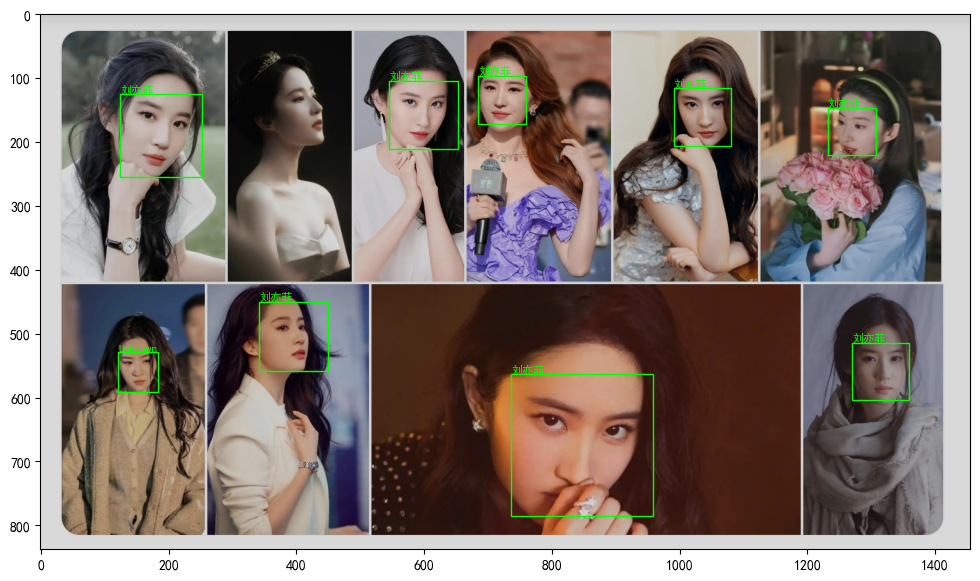

In [16]:
# 将图像转换为pil格式的图像，以便我们可以使用Pillow库在其上绘制
pil_image = Image.fromarray(unknown_image)
fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow(unknown_image)
# # 创建一个Pillow ImageDraw Draw实例来绘制
# draw = ImageDraw.Draw(pil_image)
# 循环遍历未知图像中发现的每张脸
for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    # 看看这张脸是否与已知的脸匹配。
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
    # print("matches", matches)
    name = "Unknown"

    # 给定人脸编码列表，将它们与已知的人脸编码进行比较，并得到每个比较人脸的欧氏距离。距离大小为面孔的相似程度。
    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    # print('face_distances',face_distances)
    if min(face_distances) < 0.35:
        best_match_index = np.argmin(face_distances)
        if matches[best_match_index]:
            name = known_face_names[best_match_index]

    print(name)
    # # 使用Pillow模块在脸部周围画一个框
    # draw.rectangle(((left, top), (right, bottom)), outline=(0,255,0))
 
    # # 在脸下面画一个带名字的标签
    # # text_width, text_height = draw.textsize(name)
    # font = ImageFont.truetype("simhei.ttf",  size=40)  # 设置字体
    # draw.rectangle(((left, bottom - 17 - 10), (right, bottom)),  outline=(0, 255, 0))
    # draw.text((left + 6, bottom - 17 - 5), name, fill=(255, 255, 255, 255), font=font)
    plt.text(left, top, name, color='#00ff00', fontsize=8, ha='left', va='bottom')
    
    rect = Rectangle((left, top), right-left, bottom-top, linewidth=1, edgecolor='#00ff00', facecolor='none')
    ax.add_patch(rect)

